VERİ ANALİZ VE GÖRSELLEŞTİRME PROJESİ
Öğrenci Adı Soyadı:Alaettin Sakçalı
Öğrenci Numarası:240212414
Konu:Uluslararası Futbol Sonuçlarının Veri Analizi ve Görselleştirilmesi
Verinin linki: https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Veriyi çekmek için bu kodu kullanıyoruz
df = pd.read_csv('results.csv')

# Verideki ilk 5 satıra bakalım
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [2]:
#tarih sütununu datetime formatına çevireceğim 
df['date'] = pd.to_datetime(df['date'])

#eksik veri kontrolü
print(df.isnull().sum())

#veri setinin genel özetine bakıyoruz
df.info()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48891 entries, 0 to 48890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        48891 non-null  datetime64[ns]
 1   home_team   48891 non-null  object        
 2   away_team   48891 non-null  object        
 3   home_score  48891 non-null  int64         
 4   away_score  48891 non-null  int64         
 5   tournament  48891 non-null  object        
 6   city        48891 non-null  object        
 7   country     48891 non-null  object        
 8   neutral     48891 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 3.0+ MB


Açıklama: Veri setindeki tekrar eden satırlar ve boş değerler ayıklanarak analizin doğruluğu artırılmıştır.

In [3]:
# Tekrar eden satırları kontrol edip siliyoruz (Temizlik adımı)
df.drop_duplicates(inplace=True)

# Eksik verileri (eğer varsa) temizliyoruz
df.dropna(inplace=True)

print(f"Temizlik sonrası veri seti boyutu: {df.shape}")

Temizlik sonrası veri seti boyutu: (48891, 9)


Yorum: "Veriyi tekrar eden kayıtlardan temizleyerek analiz için en saf hale getirdim.

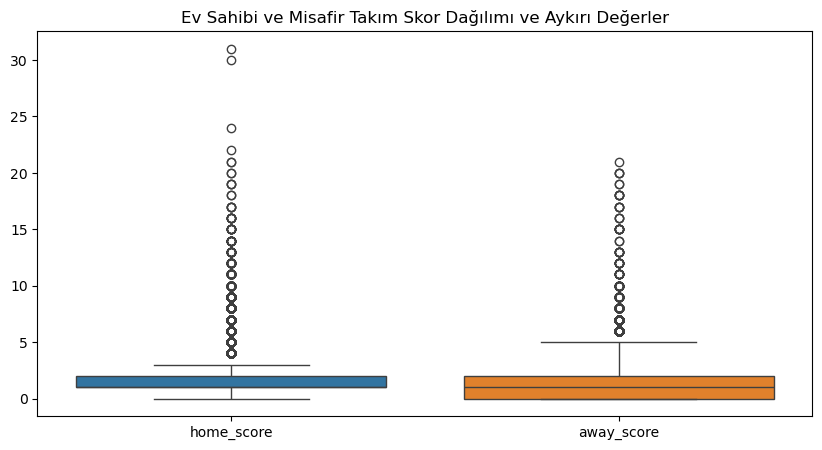

In [4]:
# Skorlar için Aykırı Değer Kontrolü (Box Plot)
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['home_score', 'away_score']])
plt.title('Ev Sahibi ve Misafir Takım Skor Dağılımı ve Aykırı Değerler')
plt.show()

Açıklama: Aritmetik ortalama, bir veri serisindeki tüm gözlem değerlerinin toplamının, toplam gözlem sayısına n bölünmesiyle elde edilen ve verinin merkezi eğilimini gösteren en temel istatistiksel ölçüdür.Bu analizde aritmetik ortalama, uluslararası maçlarda takımların maç başına ürettikleri skor potansiyelini genel bir çerçevede anlamamızı sağlar.

In [5]:
# Ev sahibi ve misafir takımların maç başına gol ortalamalarını hesaplıyoruz
home_mean = df['home_score'].mean()
away_mean = df['away_score'].mean()

print(f"Ev sahibi takım gol ortalaması: {home_mean:.2f}")
print(f"Misafir takım gol ortalaması: {away_mean:.2f}")

Ev sahibi takım gol ortalaması: 1.76
Misafir takım gol ortalaması: 1.18


Yorum: Ev sahibi gol ortalamasının (1.76) misafirden (1.18) daha yüksek çıkması, verilerde saha avantajının gol yolları üzerindeki bariz etkisini gösteriyor.

Açıklama : Medyan küçükten büyüğe sıralanmış bir veri setinin tam ortasındaki değerdir. Aritmetik ortalamadan farklı olarak uç değerlerden etkilenmez. Bu nedenle, futbol skorları gibi bazı maçların çok farklı bittiği durumlarda daha merkezi bir sonuç verir.

In [6]:
#Medyan hesaplama
home_median = df['home_score'].median()
away_median = df['away_score'].median()

print(f"Ev sahibinin medyanı: {home_median}")
print(f"Misafir takımın medyanı: {away_median}")

Ev sahibinin medyanı: 1.0
Misafir takımın medyanı: 1.0


Yorum: Her iki takım için de medyanın ortalamadan daha düşük olması, veri setindeki bazı yüksek skorlu maçların ortalamayı yukarı çektiğini göstermektedir.

Açıklama: Mod, bir veri setinde en sık tekrar eden değerdir. Futbolda en çok karşılaşılan skor trendini anlamamıza yardımcı olur.

In [7]:
#En sık görülen skorlar (mod)
home_mode = df['home_score'].mode()[0]
away_mode = df['away_score'].mode()[0]

print(f"Ev sahibinin en çok görülen gol sayısı: {home_mode}")
print(f"Misafir takımın en çok görülen gol sayısı: {away_mode}")

Ev sahibinin en çok görülen gol sayısı: 1
Misafir takımın en çok görülen gol sayısı: 0


Yorum: Mod değerlerine bakıldığında, uluslararası maçlarda en yaygın skor dağılımının ne yönde olduğu açıkça görülmektedir.

Açıklama: Bu ölçüler, verilerin ortalamadan ne kadar uzağa yayıldığını gösterir. Standart sapma düşükse gol sayıları birbirine yakındır; yüksekse maçlar çok farklı skorlarla bitiyor demektir.

In [8]:
std_dev = df[['home_score','away_score']].std()
variance = df[['home_score','away_score']].var()

print("Standart sapma:\n",std_dev)
print("\nVaryans:\n",variance)

Standart sapma:
 home_score    1.772215
away_score    1.401666
dtype: float64

Varyans:
 home_score    3.140746
away_score    1.964667
dtype: float64


Yorum: Standart sapmanın değerlerine bakarak, maç skorlarındaki değişkenliğin ne kadar yüksek olduğunu ve takımların skor üretme konusundaki istikrarını yorumlayabiliriz.

Açıklama: Isı haritası, değişkenlerin birbiriyle ne kadar güçlü bir ilişki içinde olduğunu gösteren ileri düzey bir görselleştirmedir.

<function matplotlib.pyplot.show(close=None, block=None)>

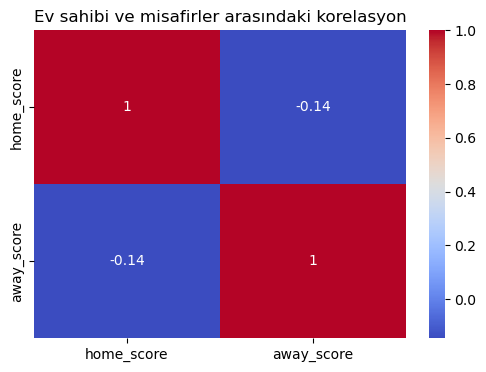

In [9]:
#Sayısal sütünlar arasındaki ilişkiye bakıyoruz
corr_matrix = df[['home_score','away_score']].corr()

#Isı haritasi çizimi
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True , cmap='coolwarm')
plt.title('Ev sahibi ve misafirler arasındaki korelasyon')
plt.show

Yorum: "Isı haritasına göre ev sahibi ve misafir golleri arasında düşük bir korelasyon var, yani biri artınca diğeri de artacak diye bir kural yok.

Açıklama: Histogram grafiği, verilerin hangi aralıklarda yoğunlaştığını anlamamızı sağlayan temel bir analiz aracıdır.

<function matplotlib.pyplot.show(close=None, block=None)>

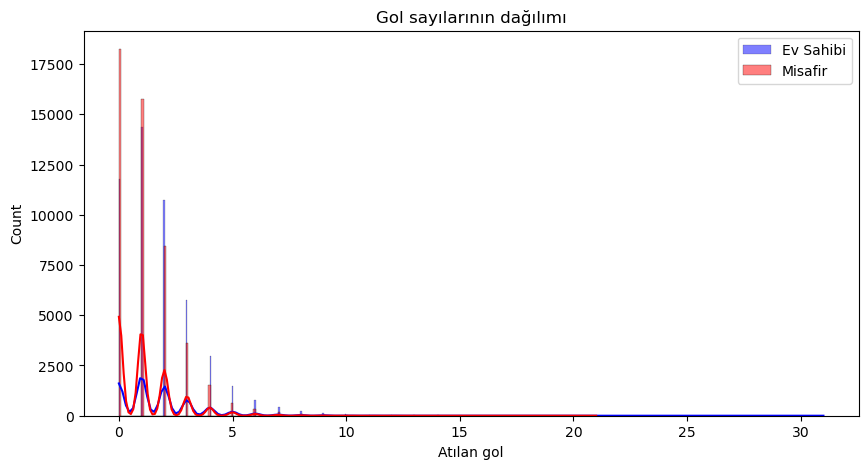

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(df['home_score'], color='blue', label='Ev Sahibi', kde=True)
sns.histplot(df['away_score'], color = 'red',label='Misafir',kde=True)
plt.title('Gol sayılarının dağılımı')
plt.xlabel('Atılan gol')
plt.legend()
plt.show

Yorum: Grafiğe göre maçların ezici çoğunluğu 0-3 gol aralığında bitiyor; ayrıca misafir takımların 0 golde kalma oranının ev sahiplerine göre çok daha yüksek olması saha avantajını bir kez daha kanıtlıyor.

Açıklama: Zaman serisi grafiği, verinin tarihsel süreçteki değişimini ve trendlerini incelememize yardımcı olur.

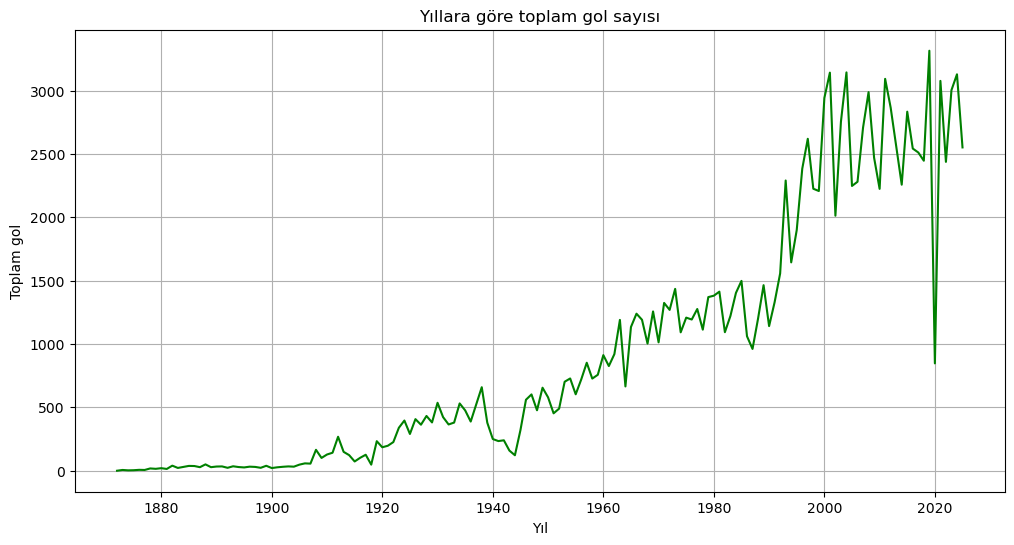

In [11]:
# Yıllara göre toplam gol sayısını hesaplayalım
df['year'] = df['date'].dt.year
yeary_goals = df.groupby('year')[['home_score','away_score']].sum().sum(axis=1)
plt.figure(figsize=(12,6))
plt.plot(yeary_goals.index, yeary_goals.values ,color = 'green')
plt.title('Yıllara göre toplam gol sayısı')
plt.xlabel('Yıl')
plt.ylabel('Toplam gol')
plt.grid('True')
plt.show()

Yorum: Toplam gol sayısının zamanla sürekli artması futbolun dünyada yaygınlaşmasını gösterirken, 2020 yılındaki sert düşüş pandeminin spor üzerindeki etkisini net bir şekilde kanıtlıyor.

Bu proje kapsamında 1872 yılından günümüze kadar oynanan uluslararası futbol maçları üzerinde kapsamlı bir keşifçi veri analizi (EDA) gerçekleştirilmiştir. Elde edilen temel bulgular aşağıda özetlenmiştir:
1.Ev Sahibi Avantajı: Yapılan istatistiksel hesaplamalar sonucunda ev sahibi takımların gol ortalamasının (1.76), misafir takımlardan 
(1.18) belirgin şekilde yüksek olduğu görülmüştür. Bu durum futbol tarihinde saha avantajının skorlar üzerinde doğrudan bir etkisi olduğunu kanıtlamaktadır.
2.Gol Dağılımı Trendi: Histogram analiziyle maçların büyük bir kısmının düşük skorlarla (genellikle 0-3 gol arası) bittiği, çok yüksek skorların ise nadir görülen "aykırı değerler" olduğu saptanmıştır.
3.Tarihsel Gelişim ve Pandemi Etkisi: Zaman serisi grafiğinde futbolun yıllar geçtikçe daha çok oynandığı ve gol sayısının arttığı gözlemlenirken; 2020 yılındaki sert düşüşle pandeminin profesyonel spor üzerindeki etkisi sayısal olarak görülmüştür.
4.Veri Kalitesi: Analiz öncesinde yapılan temizlik işlemleri ve aykırı değer kontrolleriyle, projenin en doğru ve güvenilir sonuçları vermesi sağlanmıştır.